In [107]:
import pandas as pd
import numpy as np
import re
import pickle
import random

In [108]:
data = pd.read_csv(r"D:/capestone_project/2-Data/sample30.csv")

# Senti-analysis
## Data cleaning

In [109]:
data.reviews_title = data.reviews_title.str.lower()
data.reviews_text = data.reviews_text.str.lower()

In [110]:
# 1 stands for positive and 0 is for negative
data['user_senti_encode'] = np.where(data["user_sentiment"].str.contains("Positive"), 1, 0)

In [111]:
# LEt me see dropping these entries to see if the accuracy increases
data = data[(data['reviews_rating']>=2) | (data['user_senti_encode'] != 1)]
#this drastically improves the score. Not kidding

In [112]:
# As the number of False is extremely high. We cannot avoid these reviews. Maybe can be used while recommmending
data.reviews_didPurchase.value_counts()

False    14036
True      1414
Name: reviews_didPurchase, dtype: int64

In [113]:
data.reviews_text.value_counts()[:10] # To see how to clean the review text

good                                                                                                 29
great                                                                                                19
great product                                                                                        15
excellent                                                                                             6
taste great                                                                                           5
great!                                                                                                5
good product                                                                                          4
love them                                                                                             4
very good                                                                                             4
i use this for everything especially for clean up after kids and

In [114]:
# One repetative reviwew
data[data.reviews_text=="I really don't like the new coconut smell. Please bring back the wonderful scent back for us. Obviously I am not the only one like that smell. I just bought 3 bottles of shampoo and 2 conditioner and discovered the smell has been changed to a coconut one. It really disappointed me with the smell and I am gonna return it. Sad to say that I am not going to repurchase it unless the wonderful scent being brought back :("]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,user_senti_encode


In [115]:
# Just seeing if the title is usefull
data.reviews_title.value_counts()[:10]

great product     743
great movie       664
clorox wipes      511
good movie        339
great             320
awesome           263
love it           214
love it!          165
great product!    161
clorox            159
Name: reviews_title, dtype: int64

In [116]:
pattern = 'this review was collected as part of a promotion.'
data['reviews_text'] = data.reviews_text.apply(lambda sentence:re.sub(pattern,'',sentence))

In [117]:
data.reviews_title.fillna(value= 'nan',inplace=True)

In [118]:
# Removing the whitespaces
data['reviews_title']=data.reviews_title.apply(lambda sentence: re.sub(' +', ' ',sentence.strip()))

data['reviews_text'] = data.reviews_text.apply(lambda sentence: re.sub(' +', ' ',sentence.strip()))

In [119]:
data.reviews_text[1]

'good flavor.'

In [120]:
data.reviews_text.isnull().sum()
data.reviews_title.isnull().sum()

0

In [121]:
data[data.reviews_text.str.contains('promotion')].reviews_text[:]

5527     i found this at a price that could not be pass...
15069    i created a two binder dossier for my husband'...
21855    cookie reviews jayne in our class this week we...
23159    i can't decide if i like this movie or not. i ...
28886    i received this conditioner as part of an infl...
Name: reviews_text, dtype: object

In [122]:
data[data.reviews_text.str.contains('promotion')].reviews_text[28886]
# The keyword promotion has no more magic

'i received this conditioner as part of an influenster promotion (for free) and boy am i glad i did! this conditioner does a pretty good job with my thick, wavy hair. i will be interested to see how it treats my hair over time. definitely try this for those of you who have thick, oily hair! although i received this as a promotion, the opinions are my own.'

**Finding other such keywords that can caues the similar issue**

In [123]:
data[data.reviews_text.str.contains('review purpose')].reviews_text[:]

28920    i received this product from influenster for t...
28926    i received this product free from influenster ...
28949    i have been using this conditioner with the co...
28953    i received a free sample of this product for r...
28978    i am not in love with the conditioner. the cla...
29003    i received this product from influenster for t...
29009    i received this product free from influenster ...
29042    i received a free sample of this product for r...
29054    i am not in love with the conditioner. the cla...
29067    loreal extraordinary clay pre-shampoo mask (sp...
29123    the mask leaves my hair feeling too dry but th...
29289    i was quite impressed in this conditioner. my ...
29336    i received this product complimentary for revi...
29473    the mask leaves my hair feeling too dry but th...
29493    i received this product complimentary for revi...
29522    loreal extraordinary clay pre-shampoo mask (sp...
29557    i was quite impressed in this conditioner. my .

In [124]:
data[data.reviews_text.str.contains('influenster')].reviews_text[1099]

"i am absolutely in love with this aussie aussome shampoo. i have been using it for a little over a week and my hair is visibly shinier, and smooth to the point where i can run my fingers through it and there isn't a single tangle.this leaves my hair feeling really clean, but also really smooth and shiny. this is also a pretty good deal. i recommend using it with the aussome conditioner. i received this product for free to review from influenster for testing purposes."

In [125]:
data['word_count'] = data.reviews_text.apply(lambda sentence: True if len(sentence)>=25 else False) # needed to drop reviews whch are ditto same, and given by the same user

In [126]:
data.drop_duplicates(subset=['word_count','reviews_text','id'],keep = 'first',inplace= True) # Dropping reviews which are repeated

In [127]:
data.reviews_text[1]

'good flavor.'

In [128]:
#data['tittex'] = data.reviews_title+'. '+data.reviews_text # This reduced the accuracy; revoked to just the text

In [129]:
data['id+name'] = data.id + ';'+ data.name

In [130]:
data.to_csv("D:/capestone_project/2-Data/final/sample30_cleaned.csv")

## Text preprocess

In [24]:
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer

In [25]:
# Data that is to be used for sentiment analysis
nlp_data = data.loc[:,['reviews_text','user_senti_encode']]

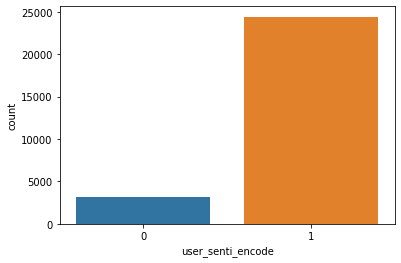

In [26]:
sns.countplot(x='user_senti_encode', data=nlp_data) # High class imbalance

In [27]:
# If there are any missing entries, then we can remove that row
#nlp_data.text.fillna(value='are',inplace=True)
nlp_data.dropna(inplace = True)

In [28]:
# Remove the not from the list as its always usefull
stop_words.remove('not')
stop_words.remove('don')
stop_words.append('influenster')
stop_words.append('promotion')

In [29]:
# cleans a sentence that is passed, notice that stemming/lammetization is yet to be done
def nlp_preprocesser(sentence):
    #print(sentence)
    #sentence = re.sub(' +', ' ',sentence.strip()) # Removes the white spaces
    words = word_tokenize(sentence)
    #Remove punctuation 
    words=[word for word in words if word.isalpha()]
    words = [word for word in words if not word in stop_words]
    # Removing the proper nouns from the text
    words = nltk.pos_tag(words)
    words = [text for (text,pos) in words if pos != 'NNP']# Proper noun
   
    words = " ".join(words)# Join to save space
    return words # Returns clean text

In [30]:
# 1st stage of preprocessed text
nlp_data['preprocessed_text']=pd.Series(nlp_data.reviews_text).apply(nlp_preprocesser)

In [31]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [32]:
# USed to convert the pos tags to terms, the lemmatizer understands
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [33]:
import random
def sent_lemmatizer(sentence):
    #tokenize the sentence and find the POS tag for each token
    #n_of_words = 150 # Restrics the number of words to 10 # this is not efiicient, so remove it
    words = word_tokenize(sentence)
    words = nltk.pos_tag(words)
    # Convert the nltk taggs to wordnet tags
    words = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), words)
    lemmatized_sentence = []
    for word, tag in words:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
   # Restricts the number of words to n_of_words 
    #if len(lemmatized_sentence) >= n_of_words:
    #    lemmatized_sentence = random.sample(lemmatized_sentence,n_of_words)
    return " ".join(lemmatized_sentence)

In [34]:
nlp_data['lemmatized_text'] = pd.Series(nlp_data.preprocessed_text).apply(sent_lemmatizer)

**Limiting the text length.**

In [35]:
nlp_data['lemmatized_text'][29999    ]

'receive product complimentary really saved hair product really give extra boost health strength bring hair back life help hair many way'

In [36]:
nlp_data.to_csv("D:/capestone_project/2-Data/final/nlp_data.csv")

## Tf-idf vectoriser|

In [37]:
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import imblearn
import pickle
from datetime import datetime

In [38]:
nlp_data.dropna(inplace=True)

In [39]:
X_train, X_test, y_train,y_test = train_test_split(nlp_data.lemmatized_text,nlp_data.user_senti_encode,test_size = 0.2,random_state =17)

In [40]:
tf_idf_vectoriser = TfidfVectorizer(ngram_range = (1,2),
                                    strip_accents='unicode',
                                    min_df = 20, max_df = 0.5,
                                   sublinear_tf=True) # an bigram would have "not ___" this would really improve the accuracy
# a word whe  considered should have atleast shown up in 5 of the documents in order to be vectorised. And should nt be there in more than 50% of the docs

In [41]:
X_train_vector = tf_idf_vectoriser.fit_transform(X_train)#.toarray().astype(np.uint8) # fit transform train, so that we can fix the class imbalance

In [42]:
# tfIdf saver
date = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
filename = f'D:/capestone_project/2-Data/final/tf_idf_{date}.sav'
pickle.dump(tf_idf_vectoriser, open(filename, 'wb'))

In [43]:
X_test_vector = tf_idf_vectoriser.transform(X_test)#.toarray().astype(np.uint8) # Transforming the test data

In [44]:
# SMOTE used to fix the class imbalance in the training
class_imb = imblearn.over_sampling.SMOTE()

In [45]:
X_train_vector_imb, y_train_imb = class_imb.fit_resample(X_train_vector,y_train)

In [46]:
X_test_vector_imb, y_test_imb = class_imb.fit_resample(X_test_vector,y_test)

In [47]:
# Check if imbalance is sorted
y_train_imb.value_counts()

1    19531
0    19531
Name: user_senti_encode, dtype: int64

## Senti models
### LogReg

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # to evaluvate the model
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
# Initiate log regression
log_reg = LogisticRegression()
log_reg.fit(X_train_vector_imb,y_train_imb) # Training the model

LogisticRegression()

In [50]:
# Evaluvation of the model on train
y_pred_train = log_reg.predict(X_train_vector_imb)
print("Train Accuracy(LOG_REG):", accuracy_score(y_pred_train, y_train_imb))
print(classification_report(y_pred_train, y_train_imb))

Train Accuracy(LOG_REG): 0.9584250678408683
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     20135
           1       0.94      0.97      0.96     18927

    accuracy                           0.96     39062
   macro avg       0.96      0.96      0.96     39062
weighted avg       0.96      0.96      0.96     39062



In [51]:
# Evaluvation of the model on test
y_pred_test = log_reg.predict(X_test_vector_imb)
print("Test Accuracy(LOG_REG):", accuracy_score(y_pred_test, y_test_imb))
print(classification_report(y_pred_test, y_test_imb))

Test Accuracy(LOG_REG): 0.9367698298831728
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4932
           1       0.93      0.94      0.94      4826

    accuracy                           0.94      9758
   macro avg       0.94      0.94      0.94      9758
weighted avg       0.94      0.94      0.94      9758



In [52]:
# To check the auc score
from sklearn.metrics import roc_auc_score 
y_pred_test = log_reg.predict(X_test_vector_imb)
print( roc_auc_score(y_pred_test, y_test_imb))

0.9368213757663697


In [53]:
# Model saver # Log reg performs the best, in comparison to the other two models
date = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
filename = f'D:/capestone_project/2-Data/final/log_reg_{date}.sav'
pickle.dump(log_reg, open(filename, 'wb'))

### Naive

In [52]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [53]:
model.fit(X_train_vector_imb.toarray(),y_train_imb)

MultinomialNB()

In [55]:
# Evaluvation of the model on test
y_pred_test = model.predict(X_test_vector.toarray())
print("Test Accuracy(Naive):", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Test Accuracy(LOG_REG): 0.8523018997090536
              precision    recall  f1-score   support

           0       0.76      0.43      0.55      1229
           1       0.86      0.96      0.91      4614

    accuracy                           0.85      5843
   macro avg       0.81      0.70      0.73      5843
weighted avg       0.84      0.85      0.84      5843



In [198]:
# Evaluvation of the model on train
y_pred_train = model.predict(X_train_vector_imb.toarray())
print("Train Accuracy(Naive):", accuracy_score(y_pred_train, y_train_imb))
print(classification_report(y_pred_train, y_train_imb))

Train Accuracy(LOG_REG): 0.8769137889398696
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20704
           1       0.88      0.88      0.88     20706

    accuracy                           0.88     41410
   macro avg       0.88      0.88      0.88     41410
weighted avg       0.88      0.88      0.88     41410



### RF

In [199]:
model_rf = RandomForestClassifier(random_state=17, n_jobs=-1)

In [200]:
params = {'max_depth':[40,50,60],
         'min_samples_leaf': [3,5],
         'max_features': [50,60],
         'n_estimators': [200,300,400]}

In [201]:
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = 4, n_jobs = -1, verbose = 1, scoring = 'accuracy' )

In [202]:
%%time
grid_search.fit(X_train_vector_imb,y_train_imb)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Wall time: 1h 14min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60], 'max_features': [50, 60],
                         'min_samples_leaf': [3, 5],
                         'n_estimators': [200, 300, 400]},
             scoring='accuracy', verbose=1)

In [203]:
rf_best = grid_search.best_estimator_

In [204]:
rf_best

RandomForestClassifier(max_depth=60, max_features=60, min_samples_leaf=3,
                       n_estimators=300, n_jobs=-1, random_state=17)

In [205]:
# Evaluvation of the model on test
y_pred_test = rf_best.predict(X_test_vector)


print("Test Accuracy(RF):", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Test Accuracy(LOG_REG): 0.9156255348279994
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       765
           1       0.95      0.96      0.95      5078

    accuracy                           0.92      5843
   macro avg       0.82      0.80      0.81      5843
weighted avg       0.91      0.92      0.91      5843



In [206]:
# Evaluvation of the model on train
y_pred_train = rf_best.predict(X_train_vector_imb)


print("Train Accuracy(RF):", accuracy_score(y_pred_train, y_train_imb))
print(classification_report(y_pred_train, y_train_imb))

Train Accuracy(LOG_REG): 0.9702004346776141
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     21121
           1       0.96      0.98      0.97     20289

    accuracy                           0.97     41410
   macro avg       0.97      0.97      0.97     41410
weighted avg       0.97      0.97      0.97     41410



# Recommender system

In [54]:
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import pairwise_distances # For findin the cosine sismilarity

In [55]:
data =  pd.read_csv(r'D:/capestone_project/2-Data/final/sample30_cleaned.csv')

In [56]:
data.reviews_username.isnull().sum()

51

In [57]:
data.dropna(subset = ['reviews_username'],inplace = True)

In [58]:
# Lets see if these provinec and city are of any use
data.reviews_userProvince.isnull().sum()
# Mostly null both city as well as province, so not much of use

27408

In [59]:
data.reviews_rating.value_counts() # Just seeing the spread

5    19827
4     5568
3     1232
1      468
2      378
Name: reviews_rating, dtype: int64

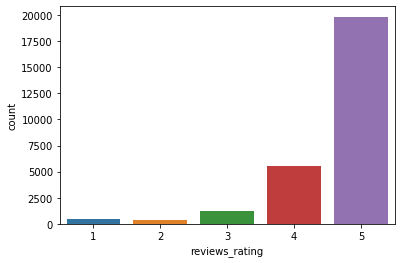

In [60]:
sns.countplot(data.reviews_rating) # There is class imbalance, here as well. But there is nothing we can do about it

In [61]:
# All the usernames with just one review
(data.reviews_username.value_counts()==1).index

Index(['mike', 'byamazon customer', 'chris', 'lisa', 'tony', 'sandy', 'rick',
       'john', 'james', 'jojo',
       ...
       'sja0826', 'tmox', 'chesneesherrie', 'chrispert', 'angikb', 'chrisvt',
       'booger', 'mander', 'se90', 'robbyrob53'],
      dtype='object', length=24367)

In [62]:
data.drop_duplicates(subset=['reviews_username','id'],keep = 'first',inplace=True) # same user same product.

Text(0.5, 1.0, 'number of unique entries')

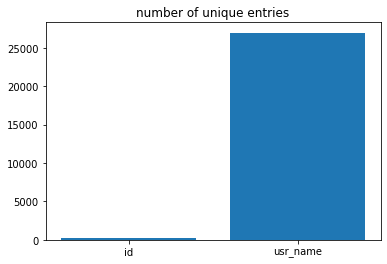

In [63]:
# Should I do an user-user or item-item recommneder
unique_values = [len(data.id.unique()),len(data.reviews_username)]
unique_entries = ['id','usr_name']
plt.bar(unique_entries, unique_values)
plt.title('number of unique entries')

In [64]:
train, test = train_test_split(data, test_size=0.20, random_state=17) # Devide into test-train for the recommendation system

In [65]:
train = data

As the item-item's correlation matrix ould be smaller and this would be more accurate as this aspect much more dense than the user-user method. I start with item-item recommendastion system. 
## Item-Item recommendation system

In [66]:
train_pivot = train.pivot(index='reviews_username',columns='id',values='reviews_rating').fillna(0).T # Transpose, as we are focused in item-item
train_pivot.sample(5)

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AVpfewoLilAPnD_xcfgU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfhpNkilAPnD_xdUZz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfPKzxLJeJML435SYL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpf-bS61cnluZ0-uZcq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpe59io1cnluZ0-ZgDU,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [67]:
# for finding which of the predictions are new

pred_marker = train_pivot.replace(0,6) # summy variable
pred_marker = pred_marker.replace([1,2,3,4,5],0) # mark all the records with a review with 0
pred_marker = pred_marker.replace(6,1)# these records are yety to be predicted
pred_marker = pred_marker.T

In [68]:
pred_marker.sample(5)
# This way of preparing the pred_marker, works fine

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
littlemommat,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bethm,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mommyjess,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
acarrill93,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bymalinut,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [69]:
item_mean_rating = np.nanmean(train_pivot, axis = 1) # The mean of review, product wise
item_mean_rating.shape

(269,)

In [70]:
# mean correction(adjustion) for adjusted cosine
train_pivot_adj = train_pivot.sub(item_mean_rating, axis= 'index')

In [71]:
# For now, using cosine similarity rather than cosine distance, as it was used earlier
item_corr = 1-pairwise_distances(train_pivot_adj.fillna(0), metric = 'cosine') # Null values have to be replaced for the function to work

In [72]:
# As we are only interested in the similarities, we set the negative correlations to 0
item_corr[item_corr < 0] = 0

In [73]:
# predictions based on the correlation matrix
ratings_prediction_item = np.dot((train_pivot.fillna(0).T),item_corr)
ratings_prediction_item

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.07986485,
        0.        ],
       [0.        , 0.        , 0.01076416, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.13310808,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [74]:
# Making sure that the original ratings stay there and only the unknown ratings are filled in the matrix
unknown_ratings_prediction = np.multiply(ratings_prediction_item,pred_marker)
unknown_ratings_prediction.sample(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
harleymads,0.0,0.0,0.03695,0.002602,0.0,0.0,0.0,0.0,0.000000,0.000017,...,0.00000,0.0,0.067269,0.0,0.0,0.059277,0.0,0.0,0.060224,0.0
wilddddkatttt80,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.019458,...,0.04348,0.0,0.146802,0.0,0.0,0.075396,0.0,0.0,0.133108,0.0
seane2588,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.015009,0.000000,...,0.00000,0.0,0.058944,0.0,0.0,0.036886,0.0,0.0,0.141210,0.0
abby8992,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
karenh2008,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [75]:
# |Top 20 recommnedations based on the item-item model
unknown_ratings_prediction.loc['bm1990'].sort_values(ascending=False)[0:20]

id
AVpfi79RLJeJML43_Jo0    0.157187
AVpe_dxlilAPnD_xSiHI    0.114860
AVpfIfnYilAPnD_xVpGi    0.113650
AVpfs0tUilAPnD_xgqN2    0.106279
AVpfBO2vLJeJML430mGh    0.089272
AVpfkQkcLJeJML43_kEC    0.089114
AVpfv4TlilAPnD_xhjNS    0.073788
AVpf0thK1cnluZ0-r8vR    0.072506
AVpfbraG1cnluZ0-kqnn    0.065589
AVpfliCoilAPnD_xegIr    0.062089
AVpe6FfKilAPnD_xQmHi    0.059201
AVpfGRUHilAPnD_xU5nU    0.057979
AVpe8xjUilAPnD_xRkxC    0.057384
AVpfMpZ51cnluZ0-f_L9    0.055411
AVpf1pwXLJeJML43EqpT    0.055083
AVpe59io1cnluZ0-ZgDU    0.051315
AVpfewoLilAPnD_xcfgU    0.048999
AVpfthSailAPnD_xg3ON    0.048991
AVpfM_ytilAPnD_xXIJb    0.048240
AVpfCuzrilAPnD_xTroT    0.044562
Name: bm1990, dtype: float64

In [77]:
# Save the recommender dataframe
filename = 'D:/capestone_project/2-Data/final/item-item-recommender.sav'
pickle.dump(unknown_ratings_prediction, open(filename, 'wb'))

['00dog3',
 '00sab00',
 '01impala',
 '02dakota',
 '02deuce',
 '0325home',
 '06stidriver',
 '08dallas',
 '09mommy11',
 '1.11E+24',
 '1085',
 '10ten',
 '11111111aaaaaaaaaaaaaaaaa',
 '1143mom',
 '11677j',
 '1234',
 '1234561',
 '1234567',
 '1234asdf',
 '123cat123',
 '123charlie',
 '123numbers',
 '123rs',
 '123soccermom',
 '123too',
 '127726',
 '12cass12',
 '12gage',
 '132457',
 '13dani',
 '13ld',
 '13ram',
 '13thfaerie',
 '1421nikki',
 '143st',
 '148maine',
 '1515',
 '15425shopper',
 '1616',
 '170361eggs',
 '1753',
 '17roses',
 '18612',
 '1863philly',
 '1943',
 '1950rmm',
 '1968bear',
 '1970',
 '1979edes',
 '1992firebirdgirl',
 '19bubba67',
 '19granny',
 '1awesome1',
 '1boomer',
 '1buzymom',
 '1cadet',
 '1chynna',
 '1clean1',
 '1cleaner',
 '1cocoafan',
 '1derpet1',
 '1friendlycat',
 '1gamer',
 '1glenn',
 '1gra',
 '1gussy',
 '1happymom',
 '1healthytot',
 '1hotmama',
 '1izzy1',
 '1jc1',
 '1jodie',
 '1kindword',
 '1movielover2',
 '1nikki31t',
 '1officegal',
 '1okc2thunder3up4',
 '1olaygal',
 